<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [26]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0, 0.5, 'Frequency')

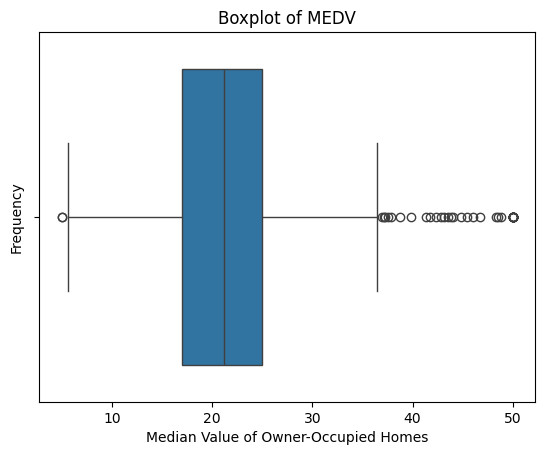

In [10]:

sns.boxplot(x=boston_df['MEDV'])
pyplot.title('Boxplot of MEDV')
pyplot.xlabel('Median Value of Owner-Occupied Homes')
pyplot.ylabel('Frequency')

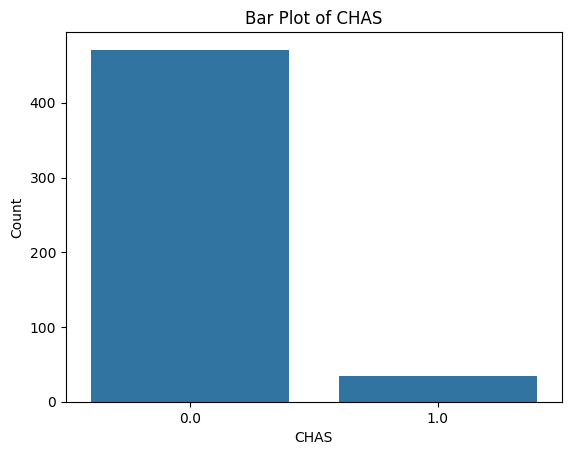

In [14]:
sns.countplot(x=boston_df['CHAS'])

# Add title and label the axes
plt.title('Bar Plot of CHAS')
plt.xlabel('CHAS')
plt.ylabel('Count')

plt.show()

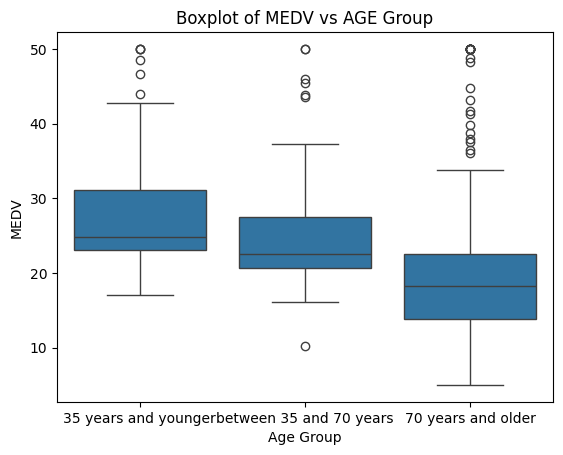

In [17]:
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=[
                                  '35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Create the boxplot
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])

# Add title and label the axes
plt.title('Boxplot of MEDV vs AGE Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')

plt.show()


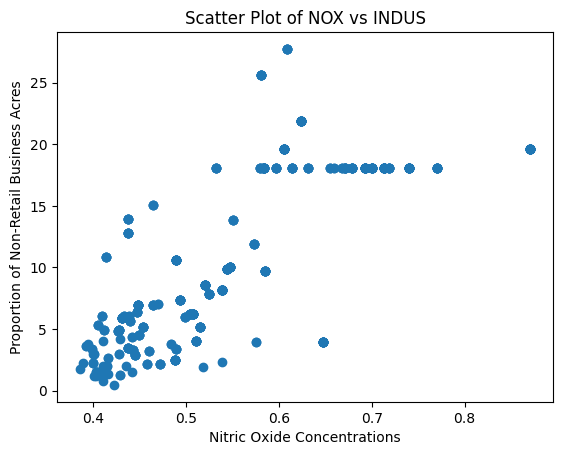

In [19]:
# Create the scatter plot
plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.xlabel('Nitric Oxide Concentrations')
plt.ylabel('Proportion of Non-Retail Business Acres')
plt.title('Scatter Plot of NOX vs INDUS')
plt.show()


In [21]:
# Regarding the relationship between NOX and INDUS, the scatter plot can help visualize the pattern. If the points on the scatter plot show a clear trend (e.g., linear, exponential, or no trend), it can provide insights into the relationship between the two variables.


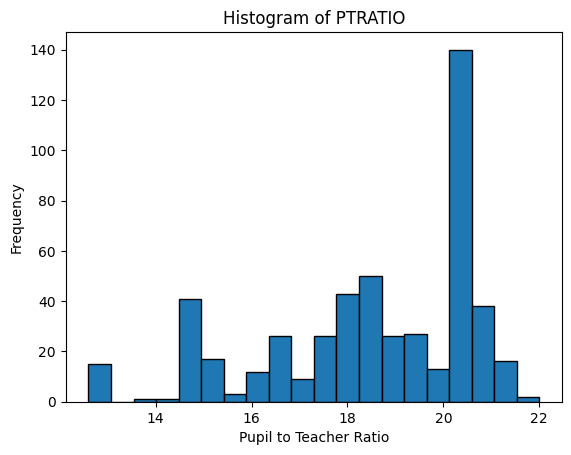

In [23]:
# Create the histogram
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black')
plt.xlabel('Pupil to Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of PTRATIO')
plt.show()

In [27]:
medv_bound = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_not_bound = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test for independent samples
t_stat, p_value = stats.ttest_ind(medv_bound, medv_not_bound)
print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05


In [ ]:
# The p-value (probability value) is a measure that helps you assess the evidence against a null hypothesis in a hypothesis test. In the context of your t-statistic and p-value, it appears that the p-value is very small (7.39e-05 or 0.0000739).

In hypothesis testing, the general rule is to compare the p-value to the significance level (also called alpha), which is typically set at 0.05 or 5%. If the p-value is less than or equal to the significance level, you would reject the null hypothesis.

In your case, the p-value (7.39e-05) is smaller than the significance level of 0.05. Therefore, you would reject the null hypothesis at the 0.05 significance level. This suggests that there is enough evidence to conclude that the observed effect in your data is statistically significant.

In summary, based on your provided information and a significance level of 0.05, the p-value is smaller than the significance level, indicating statistical significance, and you would reject the null hypothesis.


In [28]:
# Discretize the AGE variable into three groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=[
                                  '35 years and younger', 'between 35 and 70 years', '70 years and older'])

# Perform ANOVA test for the different groups of AGE
grouped_data = [boston_df[boston_df['AGE_group'] == group]['MEDV']
                for group in boston_df['AGE_group'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)
print("F-statistic:", f_stat)
print("P-value:", p_value)

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15


In [29]:
# p-value is less than 0.05 and reject the null hypothesis 

In [30]:

# Perform Pearson correlation test
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)


Pearson correlation coefficient: 0.7636514469209192
P-value: 7.913361061210442e-98


In [ ]:
# p-value is less than 0.05 and reject the null hypothesis 

In [32]:
# Add a constant term to the predictor
X = sm.add_constant(boston_df['DIS'])
y = boston_df['MEDV']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression analysis
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 13 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        05:36:50   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

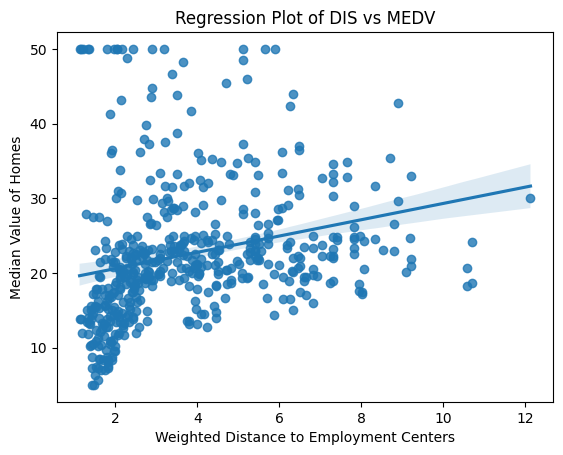

In [34]:
# Create the regression plot
sns.regplot(x=boston_df['DIS'], y=boston_df['MEDV'])
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Value of Homes')
plt.title('Regression Plot of DIS vs MEDV')
plt.show()
